In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape , len(df) , df.dtypes , df.columns , df.isnull().sum()

((50000, 2),
 50000,
 review       object
 sentiment    object
 dtype: object,
 Index(['review', 'sentiment'], dtype='object'),
 review       0
 sentiment    0
 dtype: int64)

In [4]:
df["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [5]:
y = df["sentiment"]
y = y.replace(["positive","negative"],[1,0])
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

In [6]:
y.shape

(50000,)

In [7]:
reviews=df.copy()
reviews.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [8]:
reviews['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [9]:
import re
re.sub("<.*?>","",reviews['review'][0])

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

## Data Cleaning

In [10]:
import time
start = time.time()
from IPython.display import clear_output
corpus = []
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
for i in range(0,len(reviews)):
    print(i)
    clear_output(wait=True)
    data =  re.sub('[^a-zA-Z]', ' ', reviews["review"][i])
        data = re.sub('<.*?>'," ",data)
    data = data.lower()
    data = data.split()

    data = [wordnet.lemmatize(word) for word in data if not word in stopwords.words('english')]
    data = ' '.join(data)
    corpus.append(data)
end = time.time()
print(end - start)
print(corpus)

2757.0296144485474


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
## CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_count = cv.fit_transform(corpus).toarray()
X_count.shape

(50000, 5000)

In [12]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv_2 = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_tfid = cv_2.fit_transform(corpus).toarray()
X_tfid.shape

(50000, 5000)

In [13]:
y

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64

[1 0 1 ... 1 0 0]
[[6950 1331]
 [1157 7062]] 84.92121212121212


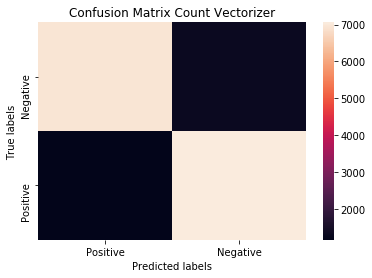

In [14]:
#######################################
########## Count Vectorizer ###########
#######################################
## Divide the dataset into Train and Test
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.33, random_state=0)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)
print(np.array(y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)

import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Count Vectorizer'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

[1 0 1 ... 1 1 0]
[[4233  802]
 [ 634 4331]] 85.64


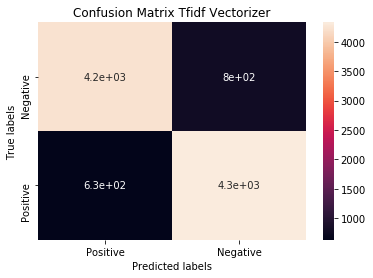

In [15]:
#######################################
########## TFIdf Vectorizer ###########
#######################################
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfid, y, test_size=0.20, random_state=0)

from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train, y_train)

y_pred=model.predict(X_test)
print(np.array(y_pred))

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test,y_pred)
print(cm,score*100)


import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Tfidf Vectorizer'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Negative', 'Positive']);

In [16]:
import pickle

# Save trained model to file
pickle.dump(cv_2, open("cv.pkl", "wb"))

In [17]:
import pickle

# Save trained model to file
pickle.dump(model, open("review_imdb.pkl", "wb"))

In [18]:
loaded_model = pickle.load(open("review_imdb.pkl", "rb"))
y_pred = loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.8564

In [19]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), np.array(y_test).reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [0 0]]


In [ ]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
def new_review(new_review):
    new_review = new_review
    new_review = re.sub('[^a-zA-Z]', ' ', new_review)
    new_review = new_review.lower()
    new_review = new_review.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    new_review = [wordnet.lemmatize(word) for word in new_review if not word in set(all_stopwords)]
    new_review = ' '.join(new_review)
    new_corpus = [new_review]
    new_X_test = cv_2.transform(new_corpus).toarray()
    print(new_X_test)
    print(new_X_test.shape)
    pred = loaded_model.predict(new_X_test)
    return pred

new_review = new_review(str(input("Enter new review...")))
if new_review[0]==1:
    print("Positive")
else :
    print("Negative")

In [ ]:
Okay, so this series kind of takes the route of 'here we go again!' Week in, week out David Morse's character helps out his ride who is in a bit of a pickle - but what's wrong with that!? David Morse is one of the greatest character actors out there, and certainly the coolest, and to have him in a series created by David Koepp - a great writer - is heaven!!<br /><br />Due to the lack of love for this show by many, I can't see it going to a season series - but you never know? The amount of rubbish that has made it beyond that baffles me - let's hope something good can make it past a first series!!!